# Python Images

Image visualization in python.

I use both Fiji and python to do image processing and analysis. Some things are easier in Fiji, others are easier in python.

This notebook contains a few basic examples of how to visualize and do simple processing of images in python.

The primary packages for image visualization, especially image stacks, is `napari`.

In [37]:
# Load Packages

# make sure the following packages are installed (e.g. via conda) before running code
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tifffile as tf
import napari
from napari_animation import Animation

# Visualizing 2D images

In [ ]:
# read in .tif as numpy array
im = tf.imread("data/220429_STeg_OMC_TdT_z114.tif") # raw downsampled image
boundaries = tf.imread("data/220429_boundaries_z114.tif") # binary image of aligned allen brain atlas boundaries

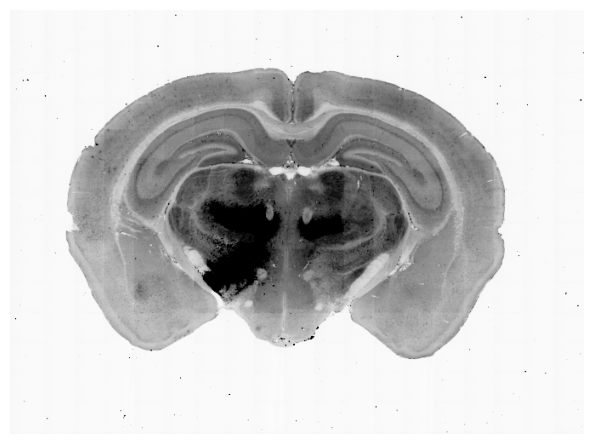

In [ ]:
# visualize raw image
plt.imshow(im,
           cmap="Grays", # used to convert to grayscale
           vmin=0,
           vmax=550) # set manually to aid visualization, akin to min/max sliders in contrast panel in fiji

plt.tight_layout()
plt.axis('off') # suppress axes

plt.show()


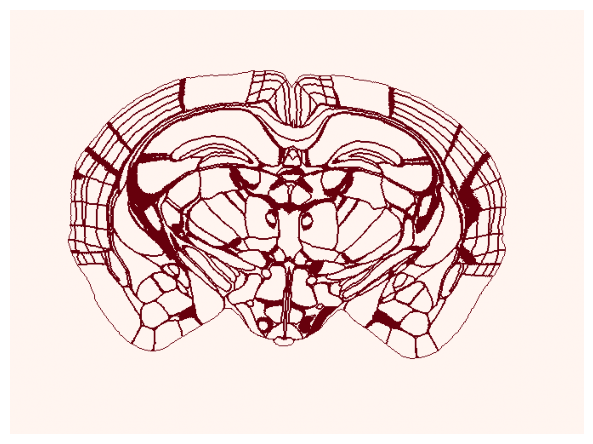

In [22]:
# visualize boundaries

plt.imshow(boundaries,
           cmap="Reds", # used to convert to grayscale
           vmin=0,
           vmax=1)

plt.tight_layout()
plt.axis('off') # suppress axes

plt.show()


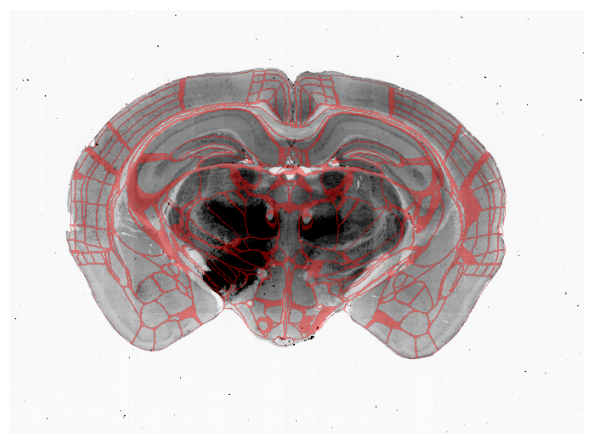

In [26]:
# Visualize overlay

# to visualize boundaries on top of image, need to convert tif to transparent color scheme, Red Green Blue Alpha (RGBA)
boundaries_rgba = np.zeros((boundaries.shape[0], boundaries.shape[1], 4)) # create empty vector for image - all pixels have blank, transparent
non_zero = boundaries>0 # create mask of non-zero values
boundaries_rgba[non_zero] = [255, 0, 0, 100] # mark non-zero values as red with transparency (assumes binary), note values range from 0-255
boundaries_rgba = boundaries_rgba.astype('int') # convert to int

# plot overlay

plt.imshow(im,
           cmap="Grays", 
           vmin=0,
           vmax=550) 

plt.imshow(boundaries_rgba) 

plt.tight_layout()
plt.axis('off') # suppress axes

plt.show()



# Visualizing 3D images

You can use napari to visualize 2D or 3D images. Napari is more interactive and allows annotations of various features.

Also, you can check out the [brainglobe](https://brainglobe.info/index.html) suite for various useful tools and tutorials for working with whole brain and atlas data.

In [27]:
# load 3D image

im3d = tf.imread("data/220429_STeg_OMC_TdT_z130-160.tif")

boundaries_3d = tf.imread("data/220429_boundaries_z130-160.tif")

In [ ]:
# Start napari session

# NOTE: screen shot size will depend on the initial size of the napari window. 
# Resize, quit and reopen napari with desired size
viewer = napari.Viewer()

In [35]:
# Add images to napari

viewer.add_image(
    im3d,
    name="STeg PAG",
    scale = [50,20,20], # resolution of z, y, x

    # these can be adjusted in the GUI, sometimes I code it for reproducibility
    contrast_limits=[0,1000],
    colormap="gray",
    blending="additive" # needed to observe layers on top of eachother


)

viewer.add_image(
    boundaries_3d,
    name="boundaries",
    scale=[50,20,20],

    # these can be adjusted in the GUI, sometimes I code it for reproducibility
    contrast_limits=[0,2],
    colormap="red",
    blending="additive" # needed to observe layers on top of eachother
)


<Image layer 'boundaries' at 0x331df9690>

In [36]:
# add scalebar
# depends on the scale set when loading images
viewer.scale_bar.visible = True
viewer.scale_bar.unit = "um"

In [39]:
# save screenshot

# set size so maintain aspect and retain right size
size=im3d.shape[1:] # just save x/y shape

# can use the following to set the z plane for imaging (optional)
viewer.dims.current_step = (15,0,0)
viewer.reset_view()


# will only save exactly what is observed in napari
viewer.screenshot("data/STeg_screenshot.png",
                      canvas_only=True, size=size)

array([[[  7,   7,   7, 255],
        [  7,   7,   7, 255],
        [  7,   7,   7, 255],
        ...,
        [  6,   6,   6, 255],
        [  6,   6,   6, 255],
        [  6,   6,   6, 255]],

       [[  7,   7,   7, 255],
        [  7,   7,   7, 255],
        [  7,   7,   7, 255],
        ...,
        [  6,   6,   6, 255],
        [  6,   6,   6, 255],
        [  6,   6,   6, 255]],

       [[  7,   7,   7, 255],
        [  7,   7,   7, 255],
        [  7,   7,   7, 255],
        ...,
        [  6,   6,   6, 255],
        [  6,   6,   6, 255],
        [  6,   6,   6, 255]],

       ...,

       [[  6,   6,   6, 255],
        [  6,   6,   6, 255],
        [  6,   6,   6, 255],
        ...,
        [  6,   6,   6, 255],
        [  5,   5,   5, 255],
        [  5,   5,   5, 255]],

       [[  6,   6,   6, 255],
        [  6,   6,   6, 255],
        [  5,   5,   5, 255],
        ...,
        [  6,   6,   6, 255],
        [  6,   6,   6, 255],
        [  6,   6,   6, 255]],

       [[  6

In [38]:
# save animation

# NOTE: to save animations, napari-animation needs to be installed (e.g. via conda)

animation = Animation(viewer)
viewer.update_console({"animation": animation})

viewer.dims.current_step = (0, 0, 0) # start on first z plane
animation.capture_keyframe()

# pause on plane z15 for 1.5 secs
viewer.dims.current_step = (15, 0, 0)
animation.capture_keyframe(15)
animation.capture_keyframe()
animation.capture_keyframe(steps=15) #  steps here will determine how long pause is

viewer.dims.current_step = (30, 0, 0) # end on last z plane
animation.capture_keyframe(steps=15)

animation.animate("data/STeg_pauses.mp4", quality=9, fps=10, canvas_only=True)


Rendering frames...


100%|██████████| 61/61 [00:06<00:00,  8.89it/s]


In [40]:
# close napari
viewer.close()